This is the tutorial for basic analysis of COVID-19 data obtained from Johns Hopkins University covid data repository.

In this tutorial, we will go through following steps:


1.   We need data for analysis :). So we have to know from where we are getting our data. For this tutorial we are getting data from Johns Hopkins University covid data repository (source: https://github.com/CSSEGISandData/COVID-19).

2.   We will visualize the raw data.

3.   We will clean the data and make nice table so that it will be easier active for us to analyze the data.

4.   Since we have data only for conformed cases, death cases and recovery cases so using this we can calulate active cases and daily cases of Covid.

5.   We will make various plots for analysis and visualization.

# 1) Let's get the data from the source. Also we will import all the necessary library for our work to be done.


We need to import all the necesary library for our analysis. Here we are importing all library

In [ ]:
!pip install pandas as pd
!pip install plotly.express
!pip install matplotlib
!pip install install pycountry
!pip install bar_chart_race
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry
import bar_chart_race as bcr


# Get data from source

Data for Global conformed Covid

In [ ]:
readConform_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

Data for Global Deaths due to Covid

In [ ]:
readDeath_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


Data for Global Recovery from Covid

In [ ]:
readRec_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# 2) Visualize the raw data

Conformed Cases

In [ ]:
print(readConform_df.head(5))

  Province/State Country/Region       Lat  ...  11/25/20  11/26/20  11/27/20
0            NaN    Afghanistan  33.93911  ...     45490     45716     45839
1            NaN        Albania  41.15330  ...     34944     35600     36245
2            NaN        Algeria  28.03390  ...     78025     79110     80168
3            NaN        Andorra  42.50630  ...      6428      6534      6610
4            NaN         Angola -11.20270  ...     14821     14920     15008

[5 rows x 315 columns]


Death Cases Due to Covid

In [ ]:
print(readDeath_df.head(5))

  Province/State Country/Region       Lat  ...  11/25/20  11/26/20  11/27/20
0            NaN    Afghanistan  33.93911  ...      1725      1737      1740
1            NaN        Albania  41.15330  ...       743       753       771
2            NaN        Algeria  28.03390  ...      2329      2352      2372
3            NaN        Andorra  42.50630  ...        76        76        76
4            NaN         Angola -11.20270  ...       340       341       342

[5 rows x 315 columns]


Recovery Cases from Covid

In [ ]:
print(readRec_df.head(5))

  Province/State Country/Region       Lat  ...  11/25/20  11/26/20  11/27/20
0            NaN    Afghanistan  33.93911  ...     36145     36232     36295
1            NaN        Albania  41.15330  ...     17031     17352     17755
2            NaN        Algeria  28.03390  ...     50712     51334     51946
3            NaN        Andorra  42.50630  ...      5542      5649      5710
4            NaN         Angola -11.20270  ...      7517      7617      7697

[5 rows x 315 columns]


From above visualization we noticed that the format of the table is same. Later we will somehow merge the table with all the details of Conformed, Death and Recovered into one final table.

# 3) Clean the data to make nice table

## we are going to use melt function to unpivot the respective column.

**melt()** function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are **“unpivoted”** to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.(source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)

In [ ]:
conform_df_1 = readConform_df.melt(
    id_vars = ['Province/State', 'Country/Region'],
    value_vars = readConform_df.columns[4:],
    var_name = 'Date',
    value_name = 'Conformed'
)

In [ ]:
deaths_df_1= readDeath_df.melt(
    id_vars = ['Province/State', 'Country/Region'],
    value_vars= readDeath_df.columns[4:],
    var_name = 'Date',
    value_name = 'Deaths'
)

In [ ]:
recovered_df_1 = readRec_df.melt(
    id_vars = ['Province/State', 'Country/Region'],
    value_vars = readRec_df.columns[4:],
    var_name = 'Date',
    value_name = 'Recovered'
)

**We are using strftime(), whcih returns a string representing date and time.**

In [ ]:

conform_df_1['Date'] = pd.to_datetime(conform_df_1['Date'])
conform_df_1['Date'] = conform_df_1['Date'].map(lambda x: x.strftime('%m/%d/%Y'))


In [ ]:
deaths_df_1['Date'] = pd.to_datetime(deaths_df_1['Date'])
deaths_df_1['Date'] = deaths_df_1['Date'].map(lambda x: x.strftime('%m/%d/%Y'))



In [ ]:
recovered_df_1['Date'] = pd.to_datetime(recovered_df_1['Date'])
recovered_df_1['Date'] = recovered_df_1['Date'].map(lambda x: x.strftime('%m/%d/%Y'))


**Lets combine all the cases using groupby()**

In [ ]:
conform_df_final = conform_df_1.groupby(['Date', 'Country/Region'])['Conformed'].sum().reset_index()
recovered_df_final = recovered_df_1.groupby(['Date', 'Country/Region'])['Recovered'].sum().reset_index()
deaths_df_final = deaths_df_1.groupby(['Date', 'Country/Region'])['Deaths'].sum().reset_index()

In [ ]:
mergeCon_Dth = conform_df_final.merge(right=recovered_df_final, how='left', on=['Date', 'Country/Region'])
final_df = mergeCon_Dth.merge(right=deaths_df_final, how='left', on=['Date', 'Country/Region'])

In [ ]:
final_df = final_df.rename(columns={'Country/Region':'Countries'})



#4) Calulate active cases and daily cases of Covid

In [ ]:
singleday_1 = final_df.groupby(['Countries', 'Date'])['Conformed', 'Recovered', 'Deaths']
singleday_1 = singleday_1.sum().diff().reset_index().fillna(0)
#singleday_1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
singleday_2 = singleday_1.rename(columns={'Conformed':'Conform-daily'})
singleday_2 = singleday_2.rename(columns={'Recovered':'Recover-daily'})
singleday_2 = singleday_2.rename(columns={'Deaths':'Death-daily'})
#singleday_2


In [ ]:
final_df = pd.merge(final_df, singleday_2, on=['Date', 'Countries'])

In [ ]:
#final_df

In [ ]:
final_num = final_df._get_numeric_data()

In [ ]:
final_num[final_num < 0] = 0

**Active cases = Conformed - (Death+Recovered)**

In [ ]:
final_df['Active'] = final_df['Conformed']- (final_df['Deaths']+final_df['Recovered'])


#################################
# **Analysis and visualization**
################################# 

# World: Total cases

In [ ]:
worlCount = final_df.groupby(['Date'])['Conformed', 'Recovered','Deaths', 'Active', 'Conform-daily', 'Recover-daily', 'Death-daily'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0, 0.5, 'Number of people')

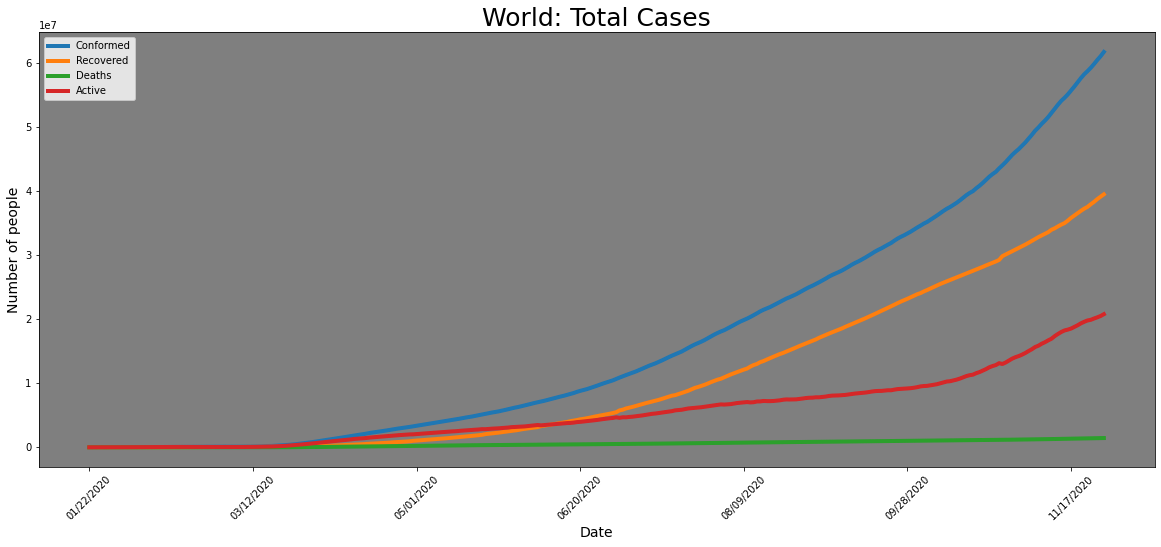

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
worlCount.plot(x='Date', y='Conformed',linewidth=4, ax=ax)
worlCount.plot(x='Date', y='Recovered',linewidth=4, ax=ax)
worlCount.plot(x='Date', y='Deaths',linewidth=4, ax=ax)
worlCount.plot(x='Date', y='Active',linewidth=4, ax=ax)
ax.set_facecolor("black")
ax.set_title('World: Total Cases', fontsize=25)
ax.patch.set_alpha(0.5)
plt.xticks(size=10, rotation=45)
plt.xlabel('Date', size=14)
plt.ylabel('Number of people', size=14)

# World: Total daily cases

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
worlCount.plot(x='Date', y='Conform-daily',linewidth=4, ax=ax)
worlCount.plot(x='Date', y='Recover-daily',linewidth=4, ax=ax)
worlCount.plot(x='Date', y='Death-daily',linewidth=4, ax=ax)
ax.set_title('World: Daily Cases', fontsize=25)
ax.set_facecolor("black")
ax.patch.set_alpha(0.5)
plt.xticks(size=10, rotation=45)
plt.xlabel('Date', size=14)
plt.ylabel('Number of people', size=14)

#World: Total Daily Cases by geography

In [ ]:
mapCasebyCountry = final_df.groupby(['Date', 'Countries'])['Conformed', 'Recovered','Deaths', 'Active', 'Conform-daily', 'Recover-daily', 'Death-daily'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
countryList = mapCasebyCountry['Countries'].unique().tolist()
countryCode = {}
for i in countryList:
    try:
        country_data = pycountry.countries.search_fuzzy(i)
        country_code = country_data[0].alpha_3
        countryCode.update({i: country_code})

    except:
       countryCode.update({i: ' '})



In [ ]:
for country, code in countryCode.items():
    mapCasebyCountry.loc[(mapCasebyCountry.Countries == country), 'iso_alpha'] = code

In [ ]:
fig = px.choropleth(data_frame = mapCasebyCountry,
                    locations = 'iso_alpha',
                    color = 'Conform-daily',
                    hover_name = 'Countries',
                    color_continuous_scale = 'RdYlGn_r',
                    animation_frame = 'Date',
                    labels = {'Conformed':'Covid development from January 2020'})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


# Race Chart for Daily Cases

Race chart take longer time to execute because, video need to be saved into mp4 format and then the need to decode in order to visualize.

In [ ]:
race_df = final_df.rename(columns={ final_df.columns[0]: "Date" })
race_df = race_df.set_index('Date')
select_five_country = race_df[(race_df['Countries']=='China') | (race_df['Countries']=='India') | (race_df['Countries']=='US') | (race_df['Countries']=='Germany') | (race_df['Countries']=='Brazil')]
race_total_Conformed = select_five_country.pivot_table(index='Date', columns='Countries', values='Conformed')

In [ ]:
# Create the matlibplot subplot where race chart will be shown.
fig, ax= plt.subplots(1, 1, figsize=(10, 7), dpi=120)
plt.subplots_adjust(left=0.2, bottom=0.2 )
ax.set_xlabel('Number of Conformed Cases', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)



In [ ]:
bcr.bar_chart_race(
     df=race_total_Conformed,
     filename='conformed.mp4',
     n_bars = 5,
     orientation = 'h',
     cmap = 'dark12',
     steps_per_period = 20,
     period_length=100,
     bar_label_size=18,
     filter_column_colors = True,
     tick_label_size=18,
     label_bars=True,
     scale='linear',
     bar_size=.95,
     figsize=(7, 5),
     period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center', 'size':18}, fig=fig)

from IPython.display import HTML
from base64 import b64encode
mp4_vid = open('/content/conformed.mp4','rb').read()
decode_video = "data:video/mp4;base64," + b64encode(mp4_vid).decode()
HTML(f'<video width=600 controls><source src={decode_video} type="video/mp4"></video>')


# Country population

In [ ]:
# Country population can be downloaded from kaggel
#https://www.kaggle.com/tanuprabhu/population-by-country-2020
pop_read = pd.read_csv('/content/population_by_country_2020.csv', usecols=['Country (or dependency)','Population (2020)'])
pop_read_sort = pop_read.sort_values(by=['Country (or dependency)'],ascending=True)
pop_read_sort = pop_read_sort.rename(columns={'Country (or dependency)':'Countries', 'Population (2020)':'Population' })


In [ ]:
pop_read_sort['Countries'] = pop_read_sort['Countries'].replace('DR Congo', 'Congo (Brazzaville)')
pop_read_sort['Countries'] = pop_read_sort['Countries'].replace('Congo', 'Congo (Kinshasa)')
pop_read_sort['Countries'] = pop_read_sort['Countries'].replace('Czech Republic (Czechia)', 'Czechia')
pop_read_sort['Countries'] = pop_read_sort['Countries'].replace('Taiwan', 'Taiwan*')
pop_read_sort['Countries'] = pop_read_sort['Countries'].replace('United States', 'US')

In [ ]:
pop_final=final_df.merge(right=test, how='left', on=['Countries'])
pop_final.dropna(subset = ['Population'], inplace=True)

In [ ]:
pop_final['percent_Conformed'] = (pop_final['Conformed']/(pop_final['Population']))*100

In [ ]:
pop_final = pop_final.rename(columns={ pop_final.columns[0]: "Date" })
pop_final = pop_final.set_index('Date')

In [ ]:
race_pop_final = pop_final.pivot_table(index='Date', columns='Countries', values='percent_Conformed')

## Percentage of total Conformed cases based on country population.

In [ ]:
# Create the matlibplot subplot where race chart will be shown.
fig1, ax= plt.subplots(1, 1, figsize=(10, 7), dpi=120)
plt.subplots_adjust(left=0.2, bottom=0.2 )
ax.set_xlabel('Percentage of Conformed Cases Based on Country Population', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

In [ ]:
bcr.bar_chart_race(
     df=race_pop_final,
     filename='conforme_percent.mp4',
     n_bars = 10,
     orientation = 'h',
     cmap = 'dark12',
     steps_per_period = 15,
     period_length=100,
     bar_label_size=18,
     filter_column_colors = True,
     tick_label_size=18,
     label_bars=True,
     scale='linear',
     bar_size=.95,
     figsize=(7, 5),
     period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center', 'size':18}, fig=fig1)

from IPython.display import HTML
from base64 import b64encode
mp4_vid = open('/content/conforme_percent.mp4','rb').read()
decode_video = "data:video/mp4;base64," + b64encode(mp4_vid).decode()
HTML(f'<video width=600 controls><source src={decode_video} type="video/mp4"></video>')